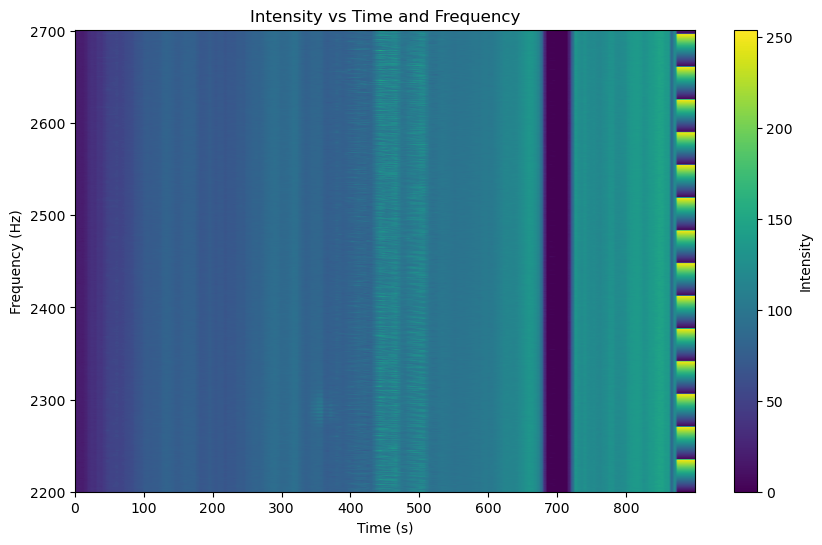

In [ ]:
import os
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fits_path = 'sat_interest_25/ETH_20250107_172151_01_satellite.fit'
hdul = fits.open(fits_path)

intensity_data = hdul[0].data
frequencies = hdul[1].data['FREQUENCY'].flatten()
times = hdul[1].data['TIME'].flatten()

# Close the FITS file after extracting data
hdul.close()

# Example of visualization: Plot intensity data over time for a particular frequency
# Assuming intensity_data is a 2D array with shape (time, frequency)
# Choose a frequency index to plot its time series
freq_index = 0  # You can change this index based on your specific needs

# Extract the intensity data for the selected frequency
intensity_time_series = intensity_data[:, freq_index]



# Optional: You can also plot the intensity as a heatmap (time vs frequency)
plt.figure(figsize=(10, 6))
plt.imshow(intensity_data, aspect='auto', origin='lower', extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='Intensity')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Intensity vs Time and Frequency')
plt.show()